In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
# Import packages/ modules
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import earthpy as et
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import datetime
from textwrap import wrap
from statsmodels.formula.api import ols
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [3]:
# Conditional statement to check and set working directory. 
ea_path = os.path.join(et.io.HOME, 'earth-analytics')

if os.path.exists(ea_path):
    os.chdir(ea_path)
    print("working directory is set to earth-analytics") 
else:     
    print("This path does not exist")
    
# Set base path to download data 
base_path = os.path.join(ea_path, "data")
base_path

working directory is set to earth-analytics


'C:\\Users\\bina_\\earth-analytics\\data'

## Techniques to measure the chemical composition of the atmosphere
measurement of PM2  with R & P Model 2025 PM-2.5 Sequential Air Sampler w/VSCC - Gravimetric
PM10_total with HI-VOL SA/GMW-1200 - GRAVIMETRIC
PM25 with Met-one BAM-1020 W/PM2.5 SCC - Beta Attenuation (optical method)
Pressure (mb) withINSTRUMENTAL - BAROMETRIC SENSOR
VOC_ppb_C = 6L Pressurized Canister - Precon Saturn GC/MS
O3_ppb, 8-HR RUN AVG BEGIN HOUR
NO2 ppb, INSTRUMENTAL - CHEMILUMINESCENCE
lead (ng/m3), Lo-Vol-Xontech 920 or 924, Teflon - ICP/Mass Spectrometer
CO ppb,  INSTRUMENTAL - Gas Filter Correlation Thermo Electron 48i-TLE
AQI, R & P Model 2025 PM-2.5 Sequential Air Sampler w/VSCC - Gravimetric

In [4]:

# Files to download for further analysis
# Define relative path to files
file_path1 = os.path.join("data","output_figures", "sandiego_2014_fires", "SD_weather_aq2014" ,                       
                         "SD_temp.csv")
file_path2 = os.path.join("data","output_figures", "sandiego_2014_fires", "SD_weather_aq2014",                        
                         "SD_pres.csv" )
file_path3 = os.path.join("data", "output_figures", "sandiego_2014_fires", "SD_weather_aq2014",                        
                         "SD_RH.csv")
file_path4 = os.path.join("data", "output_figures", "sandiego_2014_fires", "SD_weather_aq2014",                        
                         "SD_wind.csv")
file_path5 = os.path.join("data", "output_figures", "sandiego_2014_fires", "SD_weather_aq2014",                       
                         "SD_O3.csv")
file_path6 = os.path.join("data", "output_figures", "sandiego_2014_fires", "SD_weather_aq2014",                       
                         "SD_CO.csv")
file_path7 = os.path.join("data", "output_figures", "sandiego_2014_fires", "SD_weather_aq2014",                       
                         "SD_NO2.csv")
file_path8= os.path.join("data", "output_figures", "sandiego_2014_fires", "SD_weather_aq2014",                       
                         "SD_PM25.csv")
file_path9 = os.path.join("data", "output_figures", "sandiego_2014_fires", "SD_weather_aq2014",                       
                         "SD_PM10.csv")
file_path10 = os.path.join("data", "output_figures", "sandiego_2014_fires", "SD_weather_aq2014",                       
                         "SD_PM2.csv")
file_path11 = os.path.join("data", "output_figures", "sandiego_2014_fires", "SD_weather_aq2014",                       
                         "SD_lead.csv")
file_path12 = os.path.join("data", "output_figures", "sandiego_2014_fires", "SD_weather_aq2014",                       
                         "SD_VOC.csv")
file_path13 = os.path.join("data", "output_figures", "sandiego_2014_fires", "SD_weather_aq2014",                       
                         "SD_AQI.csv")

# To check if path is created
os.path.exists(file_path8)

True

In [5]:
sd_temp = pd.read_csv(file_path1, parse_dates=['Date Local'],
                                index_col=['Date Local'])
sd_pres = pd.read_csv(file_path2, parse_dates=['Date Local'],
                                index_col=['Date Local'])
sd_RH = pd.read_csv(file_path3, parse_dates=['Date Local'],
                                index_col=['Date Local'])
sd_wind = pd.read_csv(file_path4, parse_dates=['Date Local'],
                                index_col=['Date Local'])
sd_O3 = pd.read_csv(file_path5, parse_dates=['Date Local'],
                                index_col=['Date Local'])
sd_CO = pd.read_csv(file_path6, parse_dates=['Date Local'],
                                index_col=['Date Local'])
sd_NO2 = pd.read_csv(file_path7, parse_dates=['Date Local'],
                                index_col=['Date Local'])
sd_PM25 = pd.read_csv(file_path8, parse_dates=['Date Local'],
                                index_col=['Date Local'])

sd_PM10 = pd.read_csv(file_path9, parse_dates=['Date Local'],
                                index_col=['Date Local'])
sd_lead = pd.read_csv(file_path11, parse_dates=['Date Local'],
                                index_col=['Date Local'])
sd_VOC = pd.read_csv(file_path12, parse_dates=['Date Local'],
                                index_col=['Date Local'])
sd_AQI = pd.read_csv(file_path13, parse_dates=['Date Local'],
                                index_col=['Date Local'])
sd_O3.head(3)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
Date Local,,,,,,,,,,,,,,,,,,,,,
2014-01-01,6,73,1,44201,1,32.631231,-117.059075,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,31,NaN,-,Chula Vista,"80 E. 'J' ST., CHULA VISTA",California,San Diego,Chula Vista,"San Diego-Carlsbad, CA",7/20/2018
2014-01-01,6,73,3,44201,1,32.791194,-116.942092,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,38,NaN,-,El Cajon,"1155 REDWOOD AVE., EL CAJON",California,San Diego,El Cajon,"San Diego-Carlsbad, CA",7/20/2018
2014-01-01,6,73,1001,44201,1,32.952124,-117.264088,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,35,NaN,-,Del Mar,225 9th Street,California,San Diego,Del Mar,"San Diego-Carlsbad, CA",7/20/2018


In [6]:
sd_O3['City Name'].unique()
sd_O3.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean', 'O3_ppb',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [7]:
# frames = [sd_O3, sd_RH, sd_temp]
# O3_RH_t = pd.concat(frames, sort= False)
# result = df1.append([df2, df3])
# sd_combined_df = sd_O3.append([sd_RH, sd_temp, sd_pres, sd_wind, sd_CO, sd_NO2, sd_PM25], sort = False)
# sd_combined_df.set_index('Date Local', inplace=True)

# pd.DataFrame.to_csv(sd_combined_df)

sd_combined_df = pd.concat([sd_O3, sd_RH, sd_temp, sd_pres, sd_wind, sd_CO, sd_NO2], axis= 0, join = 'outer').sort_index()
# sd_combined_df.set_index('Date Local', inplace=True)
# finaldf = pd.concat([df1, df2, df3], axis=1, join='inner').sort_index()
# result.head(2)
sd_combined_df.to_csv('data/output_figures/sandiego_2014_fires/air_quality_csv/sd_cumulative_df.csv')
# print(sd_combined_df['City Name'].unique())
print(sd_combined_df.columns)
sd_combined_df.head()

C:\Users\bina_\Miniconda3\envs\earth-analytics-python\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


Index(['1st Max Hour', '1st Max Value', 'AQI', 'Address', 'Arithmetic Mean',
       'CBSA Name', 'CO_ ppb', 'City Name', 'County Code', 'County Name',
       'Date of Last Change', 'Datum', 'Event Type', 'Latitude',
       'Local Site Name', 'Longitude', 'Method Code', 'Method Name', 'O3_ppb',
       'Observation Count', 'Observation Percent', 'POC', 'Parameter Code',
       'Parameter Name', 'Pollutant Standard', 'RH (%)', 'Sample Duration',
       'Site Num', 'State Code', 'State Name', 'T_celsius', 'Units of Measure',
       'Wind (knot)', 'wind_mph'],
      dtype='object')


,1st Max Hour,1st Max Value,AQI,Address,Arithmetic Mean,CBSA Name,CO_ ppb,City Name,County Code,County Name,...,Pollutant Standard,RH (%),Sample Duration,Site Num,State Code,State Name,T_celsius,Units of Measure,Wind (knot),wind_mph
Date Local,,,,,,,,,,,,,,,,,,,,,
2014-01-01,10,0.034,31.0,"80 E. 'J' ST., CHULA VISTA",0.016529,"San Diego-Carlsbad, CA",NaN,Chula Vista,73,San Diego,...,Ozone 8-hour 2015,NaN,8-HR RUN AVG BEGIN HOUR,1,6,California,NaN,Parts per million,NaN,NaN
2014-01-01,13,6.100,NaN,"1110 BEARDSLEY STREET, SAN DIEGO, CA 92112",NaN,"San Diego-Carlsbad, CA",NaN,San Diego,73,San Diego,...,NaN,NaN,1 HOUR,1010,6,California,NaN,Knots,2.195833,2.525208
2014-01-01,10,295.000,NaN,"1110 BEARDSLEY STREET, SAN DIEGO, CA 92112",NaN,"San Diego-Carlsbad, CA",NaN,San Diego,73,San Diego,...,NaN,NaN,1 HOUR,1010,6,California,NaN,Degrees Compass,135.791667,156.160417
2014-01-01,14,6.300,NaN,"6125A KEARNY VILLA RD., SAN DIEGO",NaN,"San Diego-Carlsbad, CA",NaN,San Diego,73,San Diego,...,NaN,NaN,1 HOUR,1016,6,California,NaN,Knots,2.854167,3.282292
2014-01-01,19,357.000,NaN,"6125A KEARNY VILLA RD., SAN DIEGO",NaN,"San Diego-Carlsbad, CA",NaN,San Diego,73,San Diego,...,NaN,NaN,1 HOUR,1016,6,California,NaN,Degrees Compass,202.375000,232.731250


In [10]:
# To check empty columns
sd_combined_df.isnull().any()

1st Max Hour           False
1st Max Value          False
AQI                     True
Address                False
Arithmetic Mean         True
CBSA Name              False
CO_ ppb                 True
City Name              False
County Code            False
County Name            False
Date of Last Change    False
Datum                  False
Event Type             False
Latitude               False
Local Site Name        False
Longitude              False
Method Code             True
Method Name            False
O3_ppb                  True
Observation Count      False
Observation Percent    False
POC                    False
Parameter Code         False
Parameter Name         False
Pollutant Standard      True
RH (%)                  True
Sample Duration        False
Site Num               False
State Code             False
State Name             False
T_celsius               True
Units of Measure       False
Wind (knot)             True
wind_mph                True
dtype: bool

In [11]:
# # data_frames = [sd_temp, sd_O3, sd_NO2, sd_CO,]
# # df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date Local'],
# #                                             how='outer'), data_frames)
# # df_merged.head()

# dfs= [sd_RH, sd_temp, sd_pres, sd_wind]
# def mergefiles(dfs, countfiles, i=0):
#     if i == (countfiles - 2): # it gets to the second to last and merges it with the last
#         return

#     dfm = dfs[i].merge(mergefiles(dfs[i+1], countfiles, i=i+1), on='Date Local')
#     return dfm

# print(mergefiles(dfs, len(dfs)))
# print(dfm.columns)
#pd.DataFrame.to_csv('data/output_figures/sandiego_2014_fires/air_quality_csv/weather_chem_sd_stations.csv')

In [12]:
file_path2 = os.path.join(base_path,"output_figures","sandiego_2014_fires", "air_quality_csv",                     
                         "sd_chemical_composition_2014_mean_values_only.csv")

# To check if path is created
os.path.exists(file_path2)

True

In [13]:
sd_atm_df = pd.read_csv(file_path2, parse_dates=['Date Local'],
                                index_col=['Date Local'])
sd_atm_df.head(2)

,O3_ppm_mean,O3_ppb_mean,NO2_mean,PM2.5_mean,CO_mean
Date Local,,,,,
2014-01-01,0.022278,22.278182,18.373518,60.135417,0.902183
2014-01-02,0.018206,18.205909,22.438928,20.370473,0.947633


In [14]:
# sd_weather_2014_df.reset_index(inplace = True)
# sd_weather_2014_df.head()
# # Create plot space
# fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 
#                             sharex = True, figsize = (10, 12))
# # Add subtitle 
# fig.subplots_adjust(bottom=0.15, left=0.2)
# fig.suptitle(""" Figure 1(a-e). Atmospheric conditions during wildfires\n
#                 Mar - June 2014, San Diego, CA.""", fontsize = 20)

sd_atm_df.shape

(365, 5)

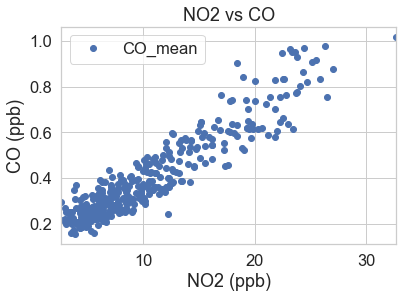

In [15]:
# fig, (ax1, ax2) = plt.subplots(2, 1
#                             sharex = True, figsize = (10, 12))
sd_atm_df.plot(x='NO2_mean', y='CO_mean', style='o', c='b')  
plt.title('NO2 vs CO')  
plt.xlabel('NO2 (ppb)')  
plt.ylabel('CO (ppm)')  
plt.show()

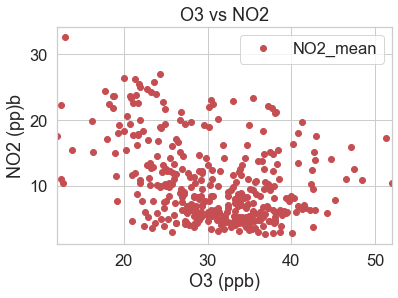

In [16]:
sd_atm_df.plot(x='O3_ppb_mean', y='NO2_mean', style='o', c='r')  
plt.title('O3 vs NO2')  
plt.xlabel('O3 (ppb)')  
plt.ylabel('NO2 (pp)b')  
plt.show()

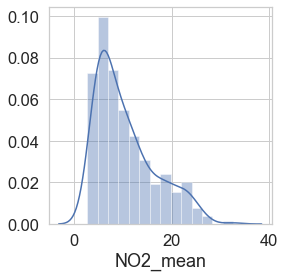

In [17]:
plt.figure(figsize=(4,4))
plt.tight_layout()
sns.distplot(sd_atm_df['NO2_mean'])

Our next step is to divide the data into “attributes” and “labels”.
Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset, we only have two columns. We want to predict the MaxTemp depending upon the MinTemp recorded. Therefore our attribute set will consist of the “MinTemp” column which is stored in the X variable, and the label will be the “MaxTemp” column which is stored in y variable.

In [25]:
sd_atm_df

,O3_ppm_mean,O3_ppb_mean,NO2_mean,PM2.5_mean,CO_mean
Date Local,,,,,
2014-01-01,0.022278,22.278182,18.373518,60.135417,0.902183
2014-01-02,0.018206,18.205909,22.438928,20.370473,0.947633
2014-01-03,0.017753,17.753455,24.411817,19.813596,0.970017
2014-01-04,0.021888,21.887636,20.027809,23.810417,0.825603
2014-01-05,0.024241,24.240636,18.920666,20.032639,0.841809
...,...,...,...,...,...
2014-12-27,0.025068,25.068273,12.637175,10.583333,0.593211
2014-12-28,0.024592,24.592364,12.066559,14.153373,0.557922
2014-12-29,0.026697,26.696600,15.172639,13.941591,0.646429


In [18]:
X = sd_atm_df['NO2_mean'].values.reshape(-1,1)
y = sd_atm_df['CO_mean'].values.reshape(-1,1)

Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
The test_size variable is where we actually specify the proportion of the test set.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

After splitting the data into training and testing sets, finally, the time is to train our algorithm. 

For that, we need to import LinearRegression class, instantiate it, 
and call the fit() method along with our training data.

As we have discussed that the linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.

In [20]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[0.09713389]
[[0.0292762]]


This means that for every one unit of change in NO2_mean, the change in the CO is about 0.029%.
Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, execute the following script:

In [44]:
# print(X_test)
X_test.shape

(73, 3)

In [22]:
y_pred = regressor.predict(X_test)


Now compare the actual output values for X_test with the predicted values, execute the following script:

In [45]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
# df.head()
print(df)

       Actual  Predicted
0   39.496778  33.963768
1   29.229364  31.405086
2   24.700636  25.743098
3   23.405000  29.826982
4   37.794300  30.561945
..        ...        ...
68  38.900727  32.440135
69  38.552900  33.083343
70  36.794000  28.852245
71  29.982500  33.297434
72  36.659667  32.139480

[73 rows x 2 columns]


We can also visualize comparison result as a bar graph using the below script :
Note: As the number of records is huge, for representation purpose I’m taking just 15 records.

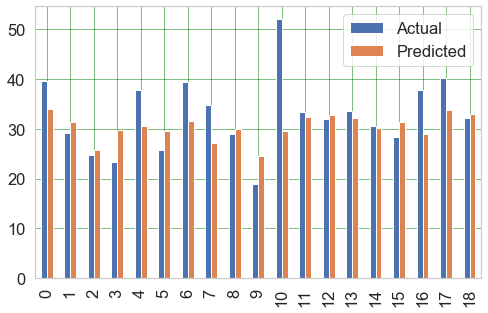

In [47]:
df1 = df.head(19)
df1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Though our model is not very precise, the predicted percentages are close to the actual ones.
Let's plot our straight line with the test data :

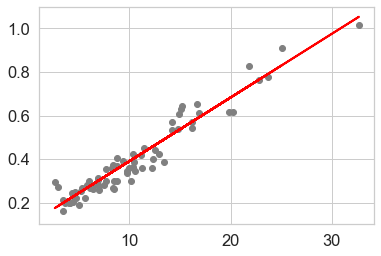

In [26]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

The straight line in the above graph shows our algorithm is correct.
The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:
1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It is calculated as:

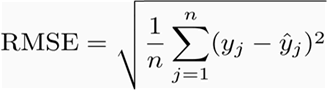


2. Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:

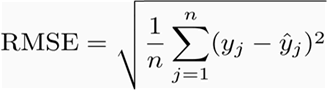

3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

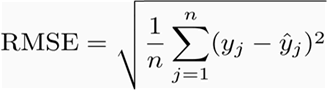

Luckily, we don’t have to perform these calculations manually. The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.
Let’s find the values for these metrics using our test data.

Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It is calculated as:


In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03790606258368175
Mean Squared Error: 0.0023326923930414834
Root Mean Squared Error: 0.04829795433599112


Multiple Linear Regression

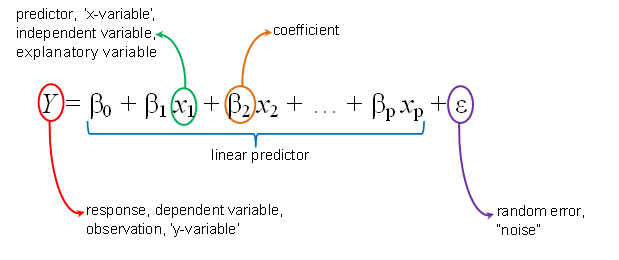

We just performed linear regression in the above section involving two variables. Almost all the real-world problems that you are going to encounter will have more than two variables. Linear regression involving multiple variables is called “multiple linear regression” or multivariate linear regression. The steps to perform multiple linear regression are almost similar to that of simple linear regression. The difference lies in the evaluation. You can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.

In [28]:
# To check empty columns
sd_atm_df.isnull().any()

O3_ppm_mean    False
O3_ppb_mean    False
NO2_mean       False
PM2.5_mean     False
CO_mean        False
dtype: bool

Once the above code is executed, all the columns should give False, 
In case for any column you find True result, then remove all the null values from that column using below code.

In [29]:
dataset = sd_atm_df.fillna(method='ffill')

In [30]:
dataset.describe()

,O3_ppm_mean,O3_ppb_mean,NO2_mean,PM2.5_mean,CO_mean
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.030693,30.693122,10.490526,10.493389,0.403001
std,0.006991,6.990947,6.042576,4.754778,0.189696
min,0.011977,11.977000,2.655821,2.066667,0.153409
25%,0.025705,25.704818,5.732708,7.730729,0.260755
50%,0.030571,30.571100,8.517046,10.026191,0.344201
75%,0.035479,35.478700,13.773292,12.513799,0.512228
max,0.052010,52.010000,32.668723,60.135417,1.017736


Our next step is to divide the data into “attributes” and “labels”. 

X variable contains all the attributes/features and y variable contains labels.

In [31]:
X = dataset[[ 'NO2_mean','CO_mean', 'PM2.5_mean']].values
y = dataset['O3_ppb_mean'].values

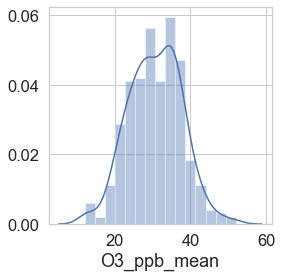

In [32]:
plt.figure(figsize=(4,4))
plt.tight_layout()
sns.distplot(dataset['O3_ppb_mean'])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# regressor = LinearRegression()  
# regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

33.395895011457256
[-0.4457463  -0.79214025  0.20259138]


In [36]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [37]:
# coeff_df = pd.DataFrame(regressor.coef_, X.columns)  
# coeff_df

In [38]:
y_pred = regressor.predict(X_test)

In [39]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,39.496778,33.963768
1,29.229364,31.405086
2,24.700636,25.743098
3,23.405000,29.826982
4,37.794300,30.561945


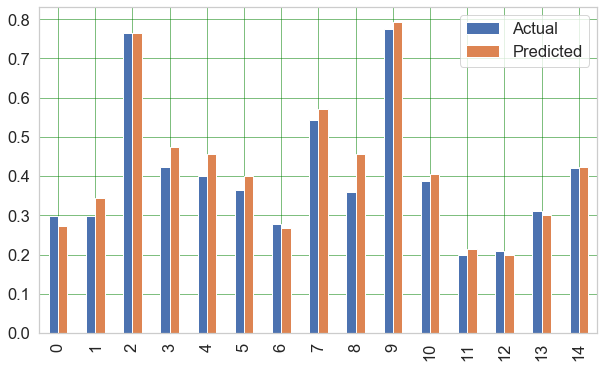

In [40]:
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.175979035211536
Mean Squared Error: 42.42135163302012
Root Mean Squared Error: 6.513167557572899


Mean O3= 30.693
RMSE = 6.51

prediction from model = (6.51/30.69)*100= 21% greater than actual value so not a great model fit. 
However O3 fromation depends on temp, pressure and destruction with OH radical, photolysis and collisons with air moleucles
